# ЗАДАНИЕ

## ОБУЧИТЬ ДЕРЕВО, подобрав глубину с помощью кроссвалидации

Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)

np.random.seed(0)

my_awesome_tree = DecisionTreeClassifier(...)

или

my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from graphviz import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

from sklearn.model_selection import train_test_split, cross_val_score 

%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
np.random.seed(0)

In [5]:
iris_data = pd.read_csv(r'C:\Audiobooks\ForDS\Iris\train_iris.csv')

In [6]:
iris_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [33]:
iris_data.species.unique()

array([2, 0, 1], dtype=int64)

In [7]:
iris_data.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [8]:
X = iris_data.drop(['Unnamed: 0', 'species'], axis=1)
y = iris_data.species

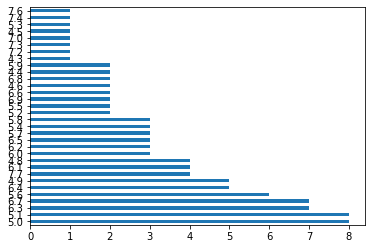

In [37]:
##### Просто для примера, как это сделать
# Рассмотрим распределение классов билетов
X['sepal length'].value_counts().plot.barh();


In [10]:
y.head()

0    2
1    0
2    0
3    2
4    2
Name: species, dtype: int64

# ОБУЧАЕМ решающее дерево

## 1 Разбить выборку на обуч и тестовую

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train = X, y

## 2 Подбор глубины дерева

In [12]:
max_depth_values = range(1, 100)

In [ ]:
#clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
#cross_val_score(clf, X_train, y_train, cv=5).mean()

### Обновим наш цикл

In [13]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    #test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    #print(cross_val_score(clf, X_train, y_train, cv=5))
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   #'test_score': [test_score],
                                   'mean_cross_val_score': [mean_cross_val_score]})

    scores_data = scores_data.append(temp_score_data)

In [14]:
scores_data.head()

,max_depth,train_score,mean_cross_val_score
0,1,0.70,0.70
0,2,0.97,0.95
0,3,0.99,0.96
0,4,1.00,0.96
0,5,1.00,0.96


In [15]:
scores_data.isnull().sum()

max_depth               0
train_score             0
mean_cross_val_score    0
dtype: int64

In [16]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], \
                           value_vars=['train_score', 'mean_cross_val_score'],\
                          var_name='set_type', value_name='score')

'''scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], \
                           value_vars=['train_score', 'test_score', 'mean_cross_val_score'],\
                          var_name='set_type', value_name='score')'''

"scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],                            value_vars=['train_score', 'test_score', 'mean_cross_val_score'],                          var_name='set_type', value_name='score')"

In [38]:
scores_data_long.groupby('set_type', as_index=False).head(3)


,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
99,1,mean_cross_val_score,0.70
100,2,mean_cross_val_score,0.95
101,3,mean_cross_val_score,0.96


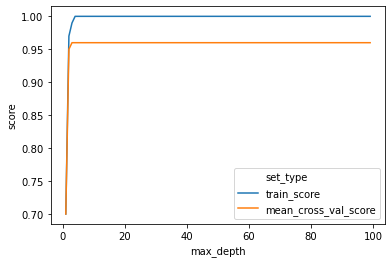

In [19]:
#sns.lineplot(x='max_depth', y='mean_cross_val_score', data=scores_data)
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [40]:
scores_data_long.query('set_type == "mean_cross_val_score"')

,max_depth,set_type,score
99,1,mean_cross_val_score,0.70
100,2,mean_cross_val_score,0.95
101,3,mean_cross_val_score,0.96
102,4,mean_cross_val_score,0.96
103,5,mean_cross_val_score,0.96
...,...,...,...
193,95,mean_cross_val_score,0.96
194,96,mean_cross_val_score,0.96
195,97,mean_cross_val_score,0.96
196,98,mean_cross_val_score,0.96


## как видим, максимальный результат 0,96 достигается при глубине 3

## Скачаем тестовые данные

In [20]:
test_data = pd.read_csv(r'C:\Audiobooks\ForDS\Iris\test_iris.csv')

In [21]:
test_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [23]:
X_test = test_data.drop(['Unnamed: 0', 'species'], axis=1)
y_test = test_data.species


## Теперь возьмем наш лучший классификатор
## как мы выяснили, это при
# max_depth=3
## и протестим его на тестовых данных, которые он ни разу не видел

In [25]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
best_clf.fit(X_train, y_train)

test_data_score = best_clf.score(X_test, y_test)

In [26]:
test_data_score

0.94

## Точность нашего классификатора = 0.94

# Визуализация дерева

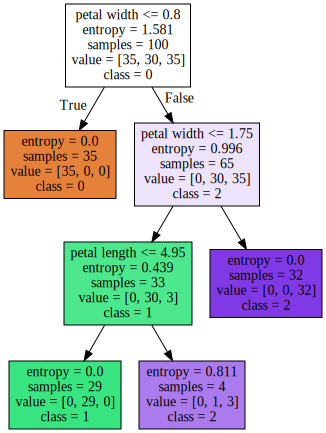

In [34]:
graph = Source(tree.export_graphviz(best_clf, out_file=None, feature_names=list(X), \
                                    class_names=['0', '1', '2'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
#-------
#При какой глубине дерева усредненная точность предсказания >= 79%
#scores_data_long.query("set_type == 'mean_cross_val_score' & score >= 0.79") \
#    .sort_values(by='score', ascending=False)
# при max_depth=7 максимальный score